 1. 进行knn模型测试

In [1]:
import pandas as pd
import numpy as np

dataset_label=pd.read_csv('../创新实践大三上/数据集/RandomLabel1.csv')
dataset_features=pd.read_csv('../创新实践大三上/数据集/RandomNodeFeatures.csv')

y1=pd.DataFrame(dataset_label)
x1=pd.DataFrame(dataset_features)
y_array=np.array(y1)
x_array=np.array(x1)
x=x_array[:,1:]
y=y_array[:,1:]
y=y.reshape(-1)



(2700, 27)


 选择合适k值

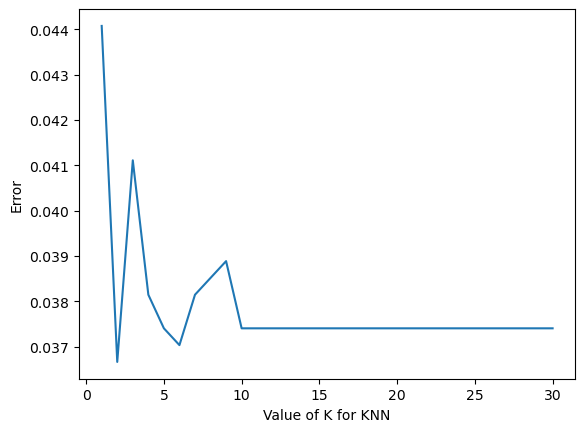

In [2]:
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 31)
k_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
     #cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores = cross_val_score(knn, x, y.astype("int"), cv=6, scoring='accuracy')
    k_error.append(1 - scores.mean())
#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()


选择完k值后进行模型评测

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

k_select=2  # 值来源于上图的输出结果
test_size=[0.75,0.65,0.55,0.45,0.35,0.25]
knn_auc=[]
knn_recall=[]
knn_precision=[]
knn_f1_score=[]

for i in range(len(test_size)):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size[i])
    knn = KNeighborsClassifier(n_neighbors=k_select)
    knn.fit(x_train,y_train.astype("int"))
    y_pre=knn.predict(x_test)
    print("测-----试-----",i)
    print("auc: ", metrics.roc_auc_score(y_test.astype('int'),y_pre.astype('int')))
    print('f1-score-micro: ',metrics.f1_score(y_test.astype("int"),y_pre.astype("int"),))
    print('f1-score-macro',metrics.f1_score(y_test.astype("int"),y_pre.astype("int"),))
    print("recall: ",metrics.recall_score(y_test.astype("int"),y_pre.astype("int")))
    print("precision: ",metrics.precision_score(y_test.astype("int"),y_pre.astype("int"),))

测-----试----- 0
auc:  0.5064102564102564
f1-score-micro:  0.02531645569620253
f1-score-macro 0.02531645569620253
recall:  0.01282051282051282
precision:  1.0
测-----试----- 1
auc:  0.5069254509166173
f1-score-micro:  0.029411764705882353
f1-score-macro 0.029411764705882353
recall:  0.015625
precision:  0.25
测-----试----- 2
auc:  0.5417421497584541
f1-score-micro:  0.14545454545454548
f1-score-macro 0.14545454545454548
recall:  0.08695652173913043
precision:  0.4444444444444444
测-----试----- 3
auc:  0.5660468907693502
f1-score-micro:  0.21818181818181817
f1-score-macro 0.21818181818181817
recall:  0.13636363636363635
precision:  0.5454545454545454
测-----试----- 4
auc:  0.5582746819913476
f1-score-micro:  0.20512820512820512
f1-score-macro 0.20512820512820512
recall:  0.11764705882352941
precision:  0.8
测-----试----- 5
auc:  0.5331790123456789
f1-score-micro:  0.11764705882352941
f1-score-macro 0.11764705882352941
recall:  0.07407407407407407
precision:  0.2857142857142857


 2. 进行线性回归模型预测

In [20]:
from sklearn.linear_model import LinearRegression  #导入线性回归模型

test_size=[0.75,0.65,0.55,0.45,0.35,0.25]

for i in range(len(test_size)):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size[i])
    model = LinearRegression()  #创建线性回归对象
    model.fit(x_train,y_train.astype('int'))
    y_pre=model.predict(x_test)
    print("测-----试-----",i)
    print("auc: ", metrics.roc_auc_score(y_test.astype('int'),y_pre.astype('int'),average=None))
    print('f1-score-micro: ',metrics.f1_score(y_test.astype("int"),y_pre.astype("int"),average=None))
    print('f1-score-macro',metrics.f1_score(y_test.astype("int"),y_pre.astype("int"),average=None))
    print("recall: ",metrics.recall_score(y_test.astype("int"),y_pre.astype("int"),average=None))
    print("precision: ",metrics.precision_score(y_test.astype("int"),y_pre.astype("int"),average=None))

测-----试----- 0
auc:  0.4999861470901963
f1-score-micro:  [0.         0.         0.         0.         0.         0.97879859
 0.02631579 0.         0.         0.        ]
f1-score-macro [0.         0.         0.         0.         0.         0.97879859
 0.02631579 0.         0.         0.        ]
recall:  [0.         0.         0.         0.         0.         0.99384931
 0.01351351 0.         0.         0.        ]
precision:  [0.         0.         0.         0.         0.         0.96419692
 0.5        0.         0.         0.        ]
测-----试----- 1
auc:  0.5079472007282658
f1-score-micro:  [0.         0.         0.         0.         0.         0.97991266
 0.05797101 0.        ]
f1-score-macro [0.         0.         0.         0.         0.         0.97991266
 0.05797101 0.        ]
recall:  [0.         0.         0.         0.         0.         0.99585799
 0.03076923 0.        ]
precision:  [0.         0.         0.         0.         0.         0.96446991
 0.5        0.        

D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327

 3. 决策树模型

In [21]:
 from sklearn .tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split

test_size=[0.75,0.65,0.55,0.45,0.35,0.25]
knn_auc=[]
knn_recall=[]
knn_precision=[]
knn_f1_score=[]

for i in range(len(test_size)):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size[i])
    model = DecisionTreeClassifier(criterion="entropy")
    model = model.fit(x_train,y_train.astype('int'))
    y_pre=model.predict(x_test)
    print("测-----试-----",i)
    print("auc: ", metrics.roc_auc_score(y_test.astype('int'),y_pre.astype('int'),average=None))
    print('f1-score-micro: ',metrics.f1_score(y_test.astype("int"),y_pre.astype("int"),average=None))
    print('f1-score-macro',metrics.f1_score(y_test.astype("int"),y_pre.astype("int"),average=None))
    print("recall: ",metrics.recall_score(y_test.astype("int"),y_pre.astype("int"),average=None))
    print("precision: ",metrics.precision_score(y_test.astype("int"),y_pre.astype("int"),average=None))


测-----试----- 0
auc:  0.7766824515071487
f1-score-micro:  [0.98928571 0.67692308]
f1-score-macro [0.98928571 0.67692308]
recall:  [0.99640288 0.55696203]
precision:  [0.9822695 0.8627451]
测-----试----- 1
auc:  0.91625702247191
f1-score-micro:  [0.99140231 0.78832117]
f1-score-macro [0.99140231 0.78832117]
recall:  [0.98876404 0.84375   ]
precision:  [0.9940547  0.73972603]
测-----试----- 2
auc:  0.8913373597929249
f1-score-micro:  [0.99334967 0.83478261]
f1-score-macro [0.99334967 0.83478261]
recall:  [0.99578947 0.78688525]
precision:  [0.99092179 0.88888889]
测-----试----- 3
auc:  0.9648250083683565
f1-score-micro:  [0.99614561 0.90526316]
f1-score-macro [0.99614561 0.90526316]
recall:  [0.99486741 0.93478261]
precision:  [0.9974271  0.87755102]
测-----试----- 4
auc:  0.9994523548740416
f1-score-micro:  [0.99945205 0.98461538]
f1-score-macro [0.99945205 0.98461538]
recall:  [0.99890471 1.        ]
precision:  [1.         0.96969697]
测-----试----- 5
auc:  0.8695987654320987
f1-score-micro:  [0